# Proper Orthogonal Decompostion applied on a Pendulum

The goal of the POD is to seperate data into modes in order to perform a possible model order reduction. In this code this is done on an arbitrarily generated pendulum dataset. After perfoming the POD, the data is reconstructed via the extracted modes. 

In the first cell, preprocessing of the data is performed

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import scipy
import scipy.io
from numpy.linalg import svd

# Loading Data from the data generation Matlab Script
data = scipy.io.loadmat('data_pod.mat')
time = data['t']                            # Assigning the time t [s]
theta = data['theta']                       # Assigning the angle of the pendulum theta [rad]
theta_dot = data['theta_dot']               # Assigning the anglular velocity of the pendulum theta [rad/s]
n_t = len(time.T)                           # Assign number of data points in time

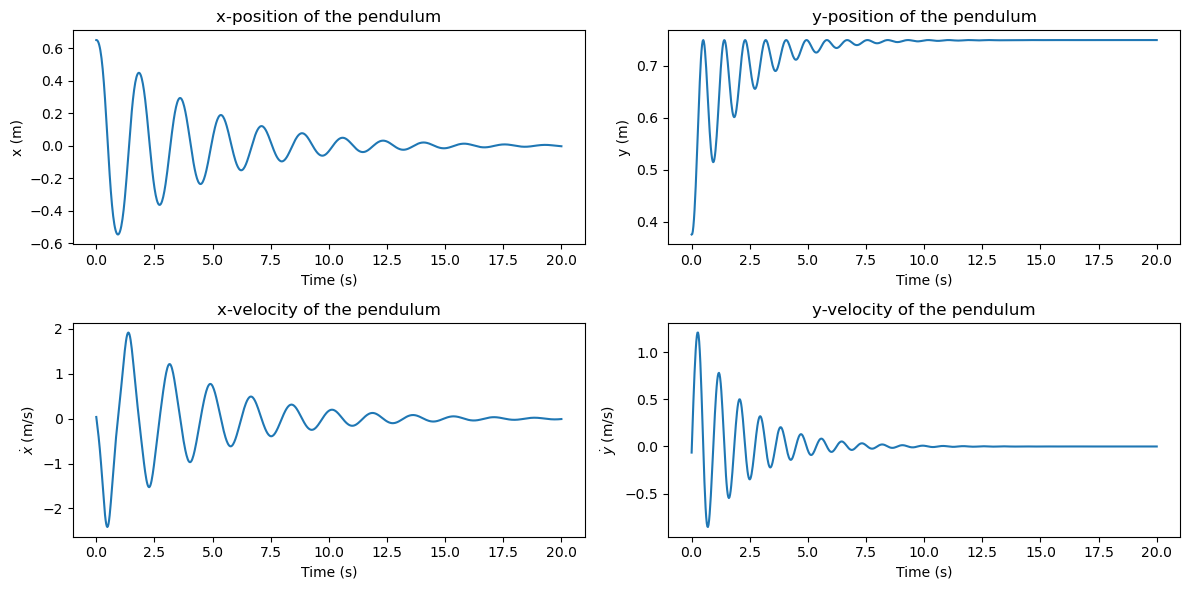

In [89]:
# Computing the x-postion
x = 0.75*np.sin(theta)
# Computing the y-postion
y = 0.75*np.cos(theta)
# Computing the x-velocity
x_dot = (0.75*theta_dot*np.cos(theta))
# Computing the y-velocity
y_dot = (-0.75*theta_dot*np.sin(theta))
# Generating the Snapshot-Matrix
snapshot =  np.vstack((x_dot.T, y_dot.T))
time = time.reshape(-1)
# Plotting the data of the Pendulum
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# First row represents the positions
axes[0, 0].plot(time, x, label='x')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('x (m)')
axes[0, 0].set_title('x-position of the pendulum')

axes[0, 1].plot(time, y, label='y')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('y (m)')
axes[0, 1].set_title('y-position of the pendulum')

# Second row represents the velocities
axes[1, 0].plot(time, x_dot, label='x_dot')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('$\dot{x}$ (m/s)')
axes[1, 0].set_title('x-velocity of the pendulum')

axes[1, 1].plot(time, y_dot, label='y_dot')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('$\dot{y}$ (m/s)')
axes[1, 1].set_title('y-velocity of the pendulum')
# layout
plt.tight_layout()
plt.show()

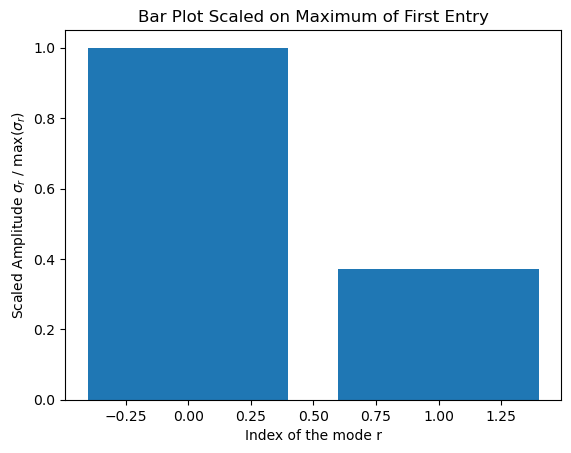

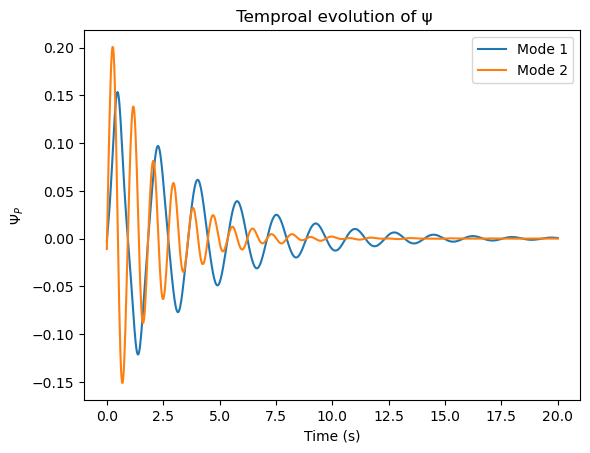

[[-0.99972437  0.02347719]
 [ 0.02347719  0.99972437]]


In [90]:
# Performing the POD with SVD
Phi,Sigma,Psi_T=svd(snapshot,full_matrices=False)
Psi=Psi_T.T # transpose (definitions)

#Plotting the results of the SVD

# Plotting of Sigma as a bar plot to visualize the modes
# Scale the data on the maximum of the first entry
scaled_Sigma = [x / Sigma[0] for x in Sigma]
# Create the  plot
plt.bar(range(len( scaled_Sigma)), scaled_Sigma)
plt.xlabel('Index of the mode r')
plt.ylabel('Scaled Amplitude $\sigma_r$ / max($\sigma_r$)')
plt.title('Bar Plot Scaled on Maximum of First Entry')
plt.show()

# Plotting of Psi to visualize the temproal structure
plt.plot(time, Psi[:, 0], label='Mode 1')
plt.plot(time, Psi[:, 1], label='Mode 2')
plt.xlabel('Time (s)')
#plt.ylabel('\u03C8_P')
plt.ylabel('$\Psi_P$')
plt.title(' Temproal evolution of \u03C8')
plt.legend()
plt.show()

# Printing the values of Phi to visualize
print(Phi)

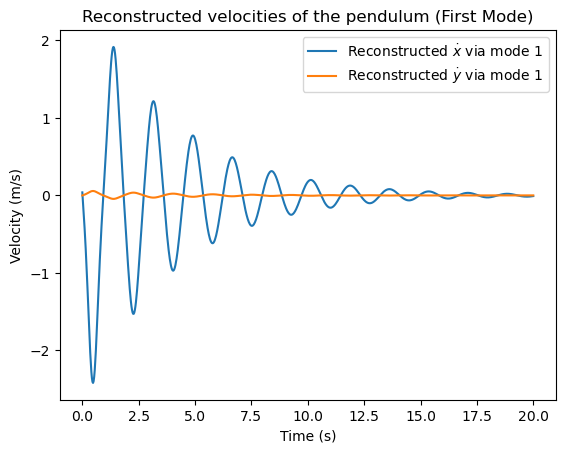

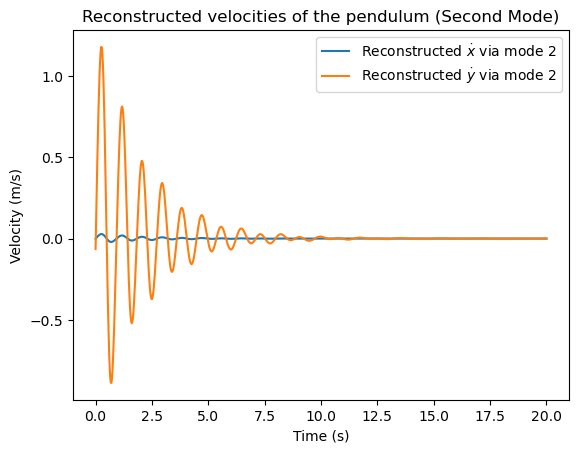

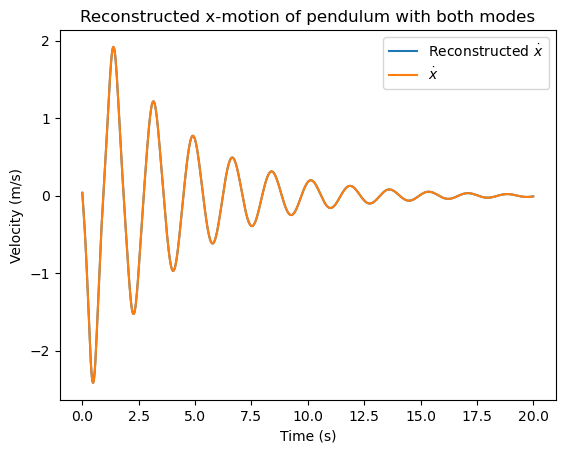

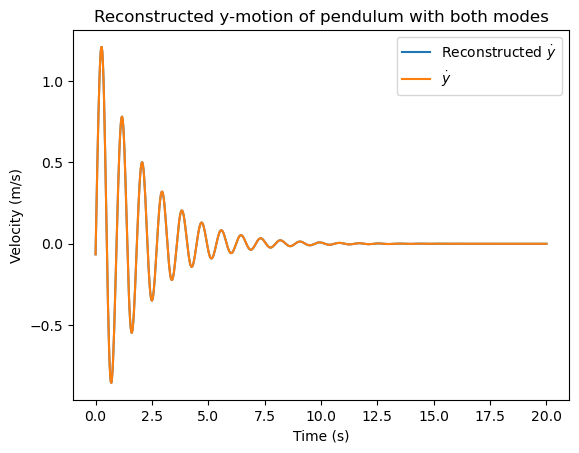

In [91]:
# Reconstructiong the trajecotries
recon = np.dot(Psi[:, 0].reshape(-1, 1), Phi[0, :].reshape(1, -1)) # Performing psi_1*phi_1 with the first mode
recon2 = np.dot(Psi[:, 1].reshape(-1, 1), Phi[1, :].reshape(1, -1)) # Performing psi_2*phi_2 with the second mode

# Formating the results of the previous step
x_rec = recon[:,0].reshape((1, n_t))
y_rec = recon[:,1].reshape((1, n_t))
x_rec2 = recon2[:,0].reshape((1, n_t))
y_rec2 = recon2[:,1].reshape((1, n_t))

# Reconstructiong x with the first mode by multiplication with sigma_1
x_rec = Sigma[0]*x_rec

# Reconstructiong y with the first mode by multiplication with sigma_1
y_rec = Sigma[0]*y_rec

# Reconstructiong x with the first mode by multiplication with sigma_2
x_rec2 = Sigma[1]*x_rec2

# Reconstructiong y with the first mode by multiplication with sigma_2
y_rec2 = Sigma[1]*y_rec2

# Plotting the reconstructions
# Plot the reconstructed motion of the pendulum using the first mode
plt.plot(time, x_rec[0,:], label='Reconstructed $\dot{x}$ via mode 1')
plt.plot(time, y_rec[0,:], label='Reconstructed $\dot{y}$ via mode 1')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Reconstructed velocities of the pendulum (First Mode)')
plt.legend()
plt.show()
# Plot the reconstructed motion of the pendulum using the second mode
plt.plot(time, x_rec2[0,:],label='Reconstructed $\dot{x}$ via mode 2')
plt.plot(time, y_rec2[0,:], label='Reconstructed $\dot{y}$ via mode 2')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Reconstructed velocities of the pendulum (Second Mode)')
plt.legend()
plt.show()

# Plot the complete reconstruction of the pendulum motion
# Plot the reconstructed x motion of the pendulum 
plt.plot(time,x_rec[0,:] + x_rec2[0,:],label='Reconstructed $\dot{x}$ ')
plt.plot(time,x_dot, label='$\dot{x}$')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Reconstructed x-motion of pendulum with both modes')
plt.legend()
plt.show()

# Plot the reconstructed y motion of the pendulum 
plt.plot(time,y_rec[0,:] + y_rec2[0,:],label='Reconstructed $\dot{y}$ ')
plt.plot(time,y_dot, label='$\dot{y}$')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Reconstructed y-motion of pendulum with both modes')
plt.legend()
plt.show()

In [92]:
# Saving the results for further processing in MATLAB (i.e. plotting)

scipy.io.savemat('x_rec_pod_vel.mat',  {'x_rec_vel':x_rec},{'x_rec2_vel':x_rec2})
scipy.io.savemat('y_rec_pod_vel.mat',  {'y_rec_vel':y_rec},{'y_rec2_vel':y_rec2})
scipy.io.savemat('x_rec2_pod_vel.mat',  {'x_rec2_vel':x_rec2})
scipy.io.savemat('y_rec2_pod_vel.mat',  {'y_rec2_vel':y_rec2})
scipy.io.savemat('phi_pod_vel.mat',  {'phi_vel':Phi})
scipy.io.savemat('psi_pod_vel.mat',  {'psi_vel':Psi})
scipy.io.savemat('sigma_pod_vel.mat',  {'sigma_vel':Sigma})
scipy.io.savemat('t_pod_vel.mat',  {'t':time})
scipy.io.savemat('x_dot_pod_vel.mat',  {'x_dot':x_dot})
scipy.io.savemat('y_dot_pod_vel.mat',  {'y_dot':y_dot})
scipy.io.savemat('x_dot.mat',  {'x_dot':x_dot})
scipy.io.savemat('y_dot.mat',  {'y_dot':y_dot})